In [85]:
import pandas as pd
import numpy as np
import copy, time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

#讀取訓練與測試資料
df_train = pd.read_csv('/Users/max/Downloads/titanic_train.csv')
df_test = pd.read_csv('/Users/max/Downloads/titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
#只取類別值 (object) 型欄位, 存於 object_features 中
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'object':
        object_features.append(feature)
print(f'{len(object_features)} Numeric Features : {object_features}\n')

# 只留類別型欄位
df = df[object_features]
df = df.fillna('None')
train_num = train_Y.shape[0]
df.head()

5 Numeric Features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,None,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,None,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,None,S


## 標籤編碼 ( Label Encoding )
    * 類似於流⽔號，依序將新出現的類別依序編上新代碼，已出現的類別編上已使⽤的代碼
    * 確實能轉成分數，但缺點是分數的⼤⼩順序沒有意義

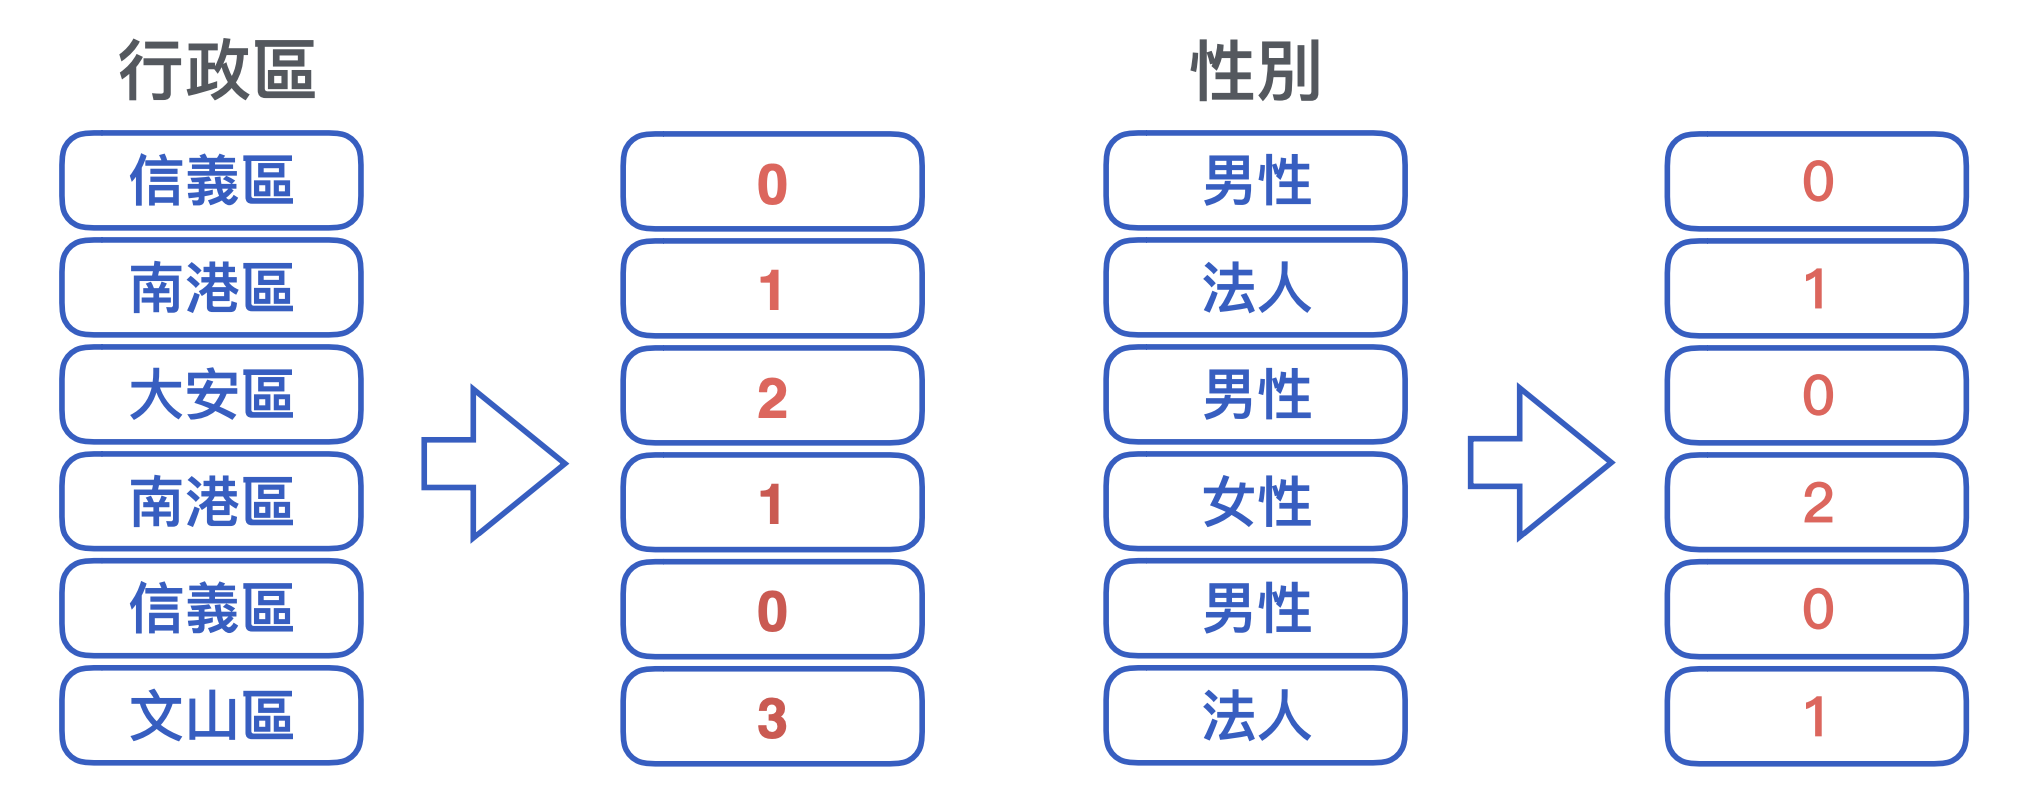

In [87]:
# 標籤編碼 + 羅吉斯迴歸
df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
train_X = df_temp[:train_num]
estimator = LogisticRegression(solver='lbfgs')
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (891, 5)
score : 0.7789000729487724
time : 0.25645899772644043 sec


In [89]:
df_temp.head()

,Name,Sex,Ticket,Cabin,Embarked
0,155,1,720,185,3
1,286,0,816,106,0
2,523,0,914,185,3
3,422,0,65,70,3
4,22,1,649,185,3


## 獨熱編碼 ( One Hot Encoding )
    * 為了改良數字⼤⼩沒有意義的問題，將不同的類別分別獨立為⼀欄
    * 缺點是需要較⼤的記憶空間與計算時間，且類別數量越多時越嚴重

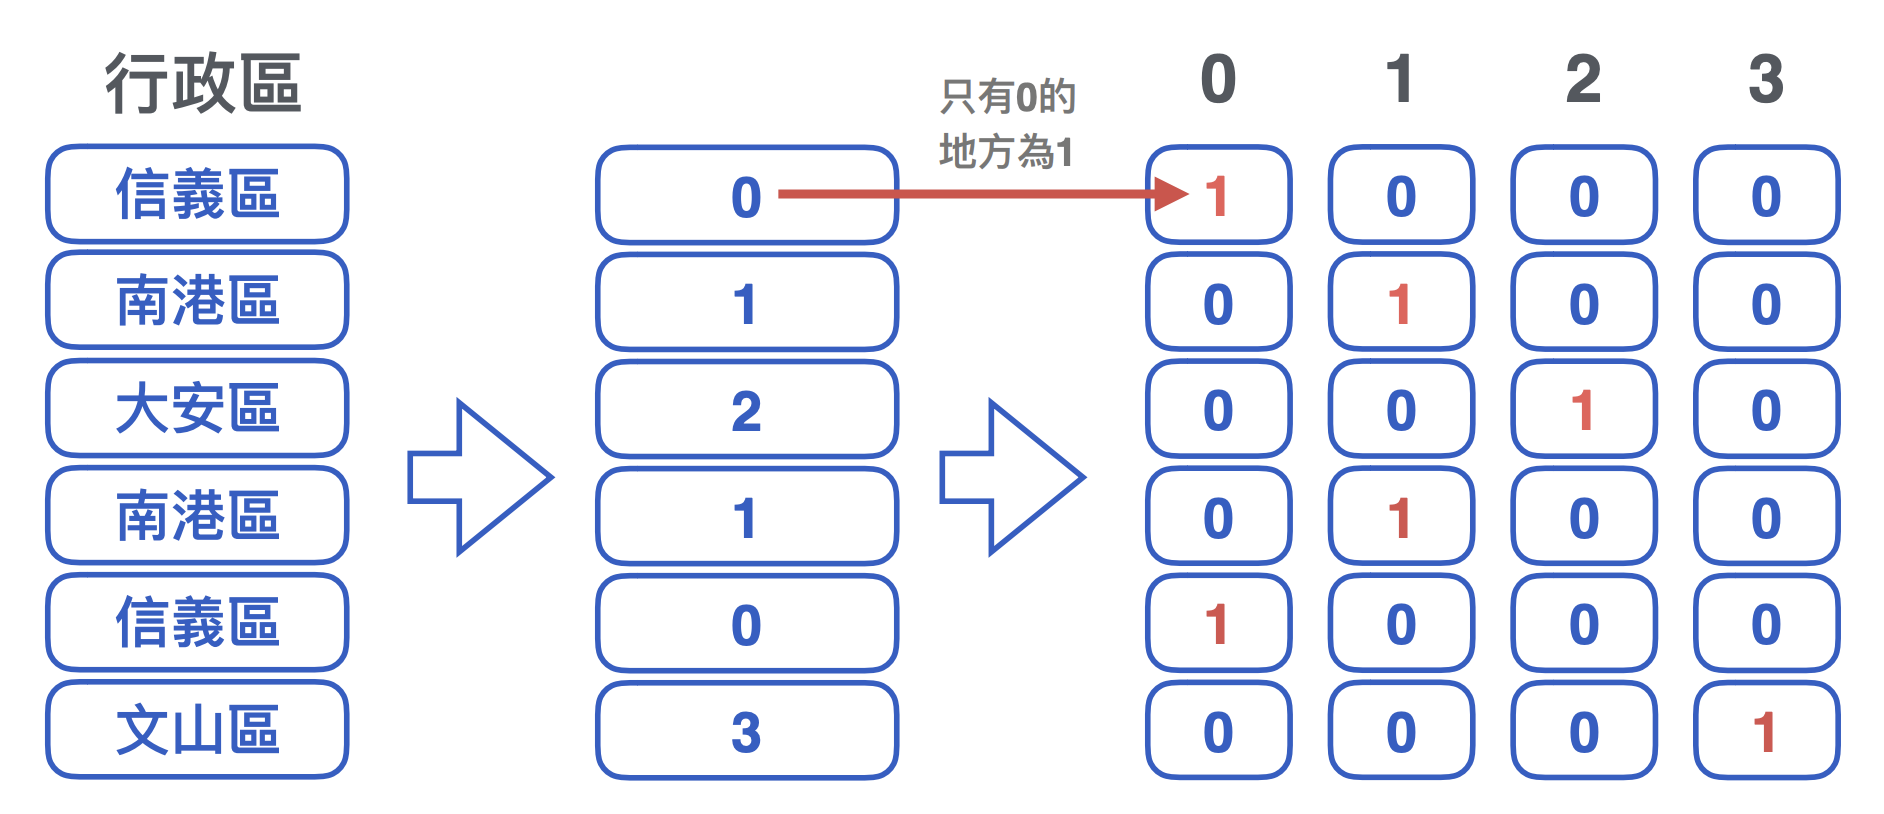

In [90]:
# 獨熱編碼 + 羅吉斯迴歸

df_temp = pd.get_dummies(df)
train_X = df_temp[:train_num]
estimator = LogisticRegression(solver='lbfgs')
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (891, 2429)
score : 0.8013346043513216
time : 0.4371190071105957 sec


In [91]:
df_temp.head()

,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Abrahamsson, Mr. Abraham August Johannes","Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)",...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_None,Cabin_T,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
